In [110]:
# from google.colab import drive
# drive.mount('/content/drive')


In [111]:
## Numpy
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.experimental import enable_iterative_imputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor # NEW
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
set_config(transform_output='pandas')

In [112]:
#Load Diabetes Risk Data
fpath = '/content/drive/MyDrive/CodingDojo/03-IntermediateMachineLearning/Week09/Data/NHANES_Diet_Diabetes_Risk.xls.csv'
df = pd.read_csv(fpath)
df.info()
df.head()
df = df.set_index("SEQN")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6643 entries, 0 to 6642
Columns: 169 entries, SEQN to Diabetes_Risk
dtypes: float64(166), int64(3)
memory usage: 8.6 MB


Preprocessing the Data

In [113]:
# Train/ Test Split

X = df.drop(columns = ['Diabetes_Risk'])
y = df['Diabetes_Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78727,70710.30601,46705.128430,1,59.0,2.0,2.0,1.0,7.0,1.0,1.0,13.0,4.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1339.0,50.73,211.40,77.68,15.8,34.75,11.780,10.515,8.776,63.0,2.54,0.0,246.0,294.0,164.0,509.0,7.0,303.0,827.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,1.0,5.0,2.0,NaN,2.0,NaN,1.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
82233,60907.62017,88806.191190,1,25.0,2.0,2.0,0.0,5.0,1.0,1.0,13.0,3.0,3.0,1.0,1.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,858.0,45.09,105.41,16.39,5.7,27.83,9.012,9.554,6.515,253.0,1.96,0.0,226.0,233.0,0.0,97.0,5.0,448.0,424.0,...,4.0,2.0,NaN,2.0,NaN,2.0,1.0,2.0,NaN,1.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,4.0,2.0,NaN,2.0
74032,46703.93997,173276.611500,1,2.0,2.0,2.0,3.0,1.0,1.0,1.0,13.0,4.0,NaN,3.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1356.0,59.90,167.90,115.17,5.2,50.45,23.208,15.741,4.577,166.0,1.83,0.0,249.0,266.0,39.0,181.0,16.0,1809.0,83.0,...,1.0,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79069,10390.35346,8097.175852,1,2.0,2.0,2.0,11.0,7.0,1.0,1.0,13.0,4.0,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1797.0,98.61,204.13,62.15,25.1,71.02,13.122,24.368,25.394,243.0,10.95,0.0,456.0,532.0,265.0,751.0,67.0,4285.0,927.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77717,48746.26378,180853.851200,1,25.0,2.0,2.0,20.0,1.0,1.0,1.0,13.0,1.0,2.0,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,4299.0,138.95,559.97,299.94,27.8,174.33,65.027,59.996,27.510,276.0,15.81,0.0,606.0,737.0,18.0,1509.0,21.0,31209.0,928.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
## PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
# Making a numeric tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=167)


In [115]:
# Create the Column Transformer
col_transformer = ColumnTransformer([num_tuple],
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['WTDRD1', 'WTDR2D', 'DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT',
       'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP',
       ...
       'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ', 'DRD370T',
       'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V'],
      dtype='object', length=167))],
                  verbose_feature_names_out=False)

In [116]:
# fit the column transformer on X_train
col_transformer.fit(X_train)
# Transform X_train and X_test
X_train_tf = col_transformer.transform(X_train)
X_test_tf = col_transformer.transform(X_test)
X_train_tf.head()

,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,DR1TVB1,...,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78727,0.828246,0.121669,-0.295989,0.759244,0.0,0.338808,-1.340234,1.195759,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.165331,0.189828,-0.046713,-1.392493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929421,-0.758725,-0.672011,-0.332717,-0.434149,-0.060394,-0.974490,-0.868066,-0.995841,-0.768236,-0.944910,-0.784441,-0.182283,-0.397301,-0.527561,-0.157457,-0.349554,-0.191218,-0.523296,-0.174656,-0.295260,...,-0.097381,0.173753,-0.087421,0.049137,-0.027836,0.0,-0.473916,0.265908,-0.138889,-1.830599,2.224798,0.118509,-0.059742,0.329903,-0.012884,-3.540910,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,0.408678,-0.101500,0.203975,-0.030765,0.0
82233,0.579175,0.890047,-0.295989,-0.965540,0.0,0.338808,-1.429137,0.240609,-0.256418,-0.073655,0.079215,-0.035916,1.737711,-1.812684,-1.192806,0.433627,0.145392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.587796,-1.251760,-0.800935,-1.194710,-1.250417,-1.052084,-1.124673,-1.042537,-1.051694,-0.942262,-0.127315,-0.858855,-0.182283,-0.448869,-0.637360,-0.301731,-0.449779,-0.196408,-0.504781,-0.288864,1.562895,...,1.288762,0.173753,-0.087421,0.049137,-0.027836,0.0,-0.473916,0.265908,-0.138889,-1.830599,0.669048,0.118509,-0.059742,0.329903,-0.012884,0.282413,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,-2.446912,1.714198,0.203975,-0.030765,0.0
74032,0.218283,2.431698,-0.295989,-2.132305,0.0,0.338808,-1.162428,-1.669691,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.165331,0.189828,-0.046713,-1.392493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.587796,-0.741300,-0.462396,-0.686493,0.065147,-1.101178,-0.633755,-0.147745,-0.692104,-1.091427,-0.501687,-0.875534,-0.182283,-0.389566,-0.577960,-0.267422,-0.429345,-0.167867,-0.330998,-0.385502,-1.128112,...,-0.790452,0.173753,-0.087421,0.049137,-0.027836,0.0,0.777302,0.265908,-0.138889,0.546269,-0.108828,0.118509,-0.059742,0.329903,-0.012884,0.282413,0.008096,0.191366,-0.045487,0.163686,-0.091755,0.114976,-0.053017,0.114976,0.007871,0.042541,-0.026784,0.141653,-0.072072,0.069575,0.0,0.531073,-0.110681,0.173139,-0.029237,0.114076,-0.059343,0.031696,-0.014169,0.09759,-0.033699,0.14956,-0.079295,0.054954,-0.032364,0.408678,-0.101500,0.203975,-0.030765,0.0
79069,-0.704387,-0.582956,-0.295989,-2.132305,0.0,0.338808,-0.451206,1.195759,-0.256418,-0.073655,0.079215,0.044540,0.268633,-0.989007,0.189828,-0.046713,0.145392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.592262,-0.289266,0.422469,-0.391842,-0.640980,0.852746,-0.187328,-0.783478,-0.190701,0.510826,-0.170346,0.294560,-0.182283,0.144158,-0.099162,-0.068606,-0.290684,-0.035542,-0.014842,-0.146317,1.192370,.

In [117]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_X_train = scaler.fit_transform(X_train_tf)
scaled_X_test = scaler.transform(X_test_tf)

# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)
scaled_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,DBD100,DRQSPREP,DR1STY,DR1SKY,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRQSDT91,DR1TNUMF,DR1TKCAL,DR1TPROT,DR1TCARB,DR1TSUGR,DR1TFIBE,DR1TTFAT,DR1TSFAT,DR1TMFAT,DR1TPFAT,DR1TCHOL,DR1TATOC,DR1TATOA,DR1TRET,DR1TVARA,DR1TACAR,DR1TBCAR,DR1TCRYP,DR1TLYCO,DR1TLZ,...,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73557,-0.545998,-0.512591,-0.296272,0.262077,0.0,0.354729,-0.853108,-1.133212,-0.269283,-0.074509,0.086791,-0.041379,0.354176,0.639125,0.211980,NaN,0.176139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.725490,-0.516296,-0.808288,-0.110882,0.827009,-0.544478,-0.582927,-0.491150,-0.537526,-0.762391,-0.337820,-0.624126,-0.19597,-0.855078,-0.855043,-0.268196,-0.406198,0.489377,-0.409159,-0.308858,...,NaN,NaN,NaN,NaN,NaN,NaN,0.734211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73558,-0.519370,-0.516962,-0.296272,0.750254,0.0,0.354729,-1.024467,-1.593822,-0.269283,-0.074509,0.086791,-0.201435,0.354176,-0.169518,-1.157618,-0.107682,0.176139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.211512,2.894279,5.444311,1.318343,-0.847373,0.010913,0.907515,1.643051,0.413573,0.113792,9.199615,1.545410,-0.19597,2.691655,1.557552,-0.321060,-0.443136,-0.195530,-0.576783,-0.172119,...,-0.615507,0.259699,NaN,0.070617,NaN,0.0,-0.500352,0.355351,NaN,0.795616,NaN,0.160582,NaN,0.450447,NaN,0.371311,NaN,0.246577,NaN,0.206703,NaN,0.146873,NaN,0.145077,NaN,0.050201,NaN,-5.645886,-0.519369,0.088623,NaN,0.756526,NaN,0.224579,NaN,0.141421,NaN,0.04489,NaN,0.119492,NaN,0.199319,NaN,0.076259,NaN,0.571351,NaN,0.269844,NaN,0.0
73559,0.544666,-0.043713,-0.296272,0.262077,0.0,0.354729,0.175045,0.709226,-0.269283,-0.074509,0.086791,-0.201435,-0.862973,-0.978161,0.211980,NaN,-1.403441,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.866623,-0.351048,-0.362856,-0.228827,-0.109896,-0.629199,-0.308526,-0.044748,-0.402654,-0.452920,-0.823727,0.006850,-0.19597,0.521266,0.099140,-0.302558,-0.372512,-0.136309,-0.515033,-0.346760,...,NaN,0.259699,NaN,0.070617,NaN,0.0,0.734211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73561,0.529628,-0.050611,-0.296272,0.945525,0.0,0.354729,0.175045,-1.593822,-0.269283,-0.074509,0.086791,0.038649,NaN,0.639125,0.211980,NaN,-1.403441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.373519,-0.665900,-0.561793,-0.587239,-0.302447,-0.403277,-0.529756,-1.291123,-0.105142,-1.330154,-1.012468,5.653760,-0.19597,0.828801,0.463305,-0.321060,-0.133924,-0.226428,-0.576783,-0.434226,...,NaN,0.259699,NaN,0.070617,NaN,0.0,-0.500352,0.355351,NaN,-1.256888,-0.612994,0.160582,NaN,0.450447,NaN,0.371311,NaN,0.246577,NaN,0.206703,NaN,0.146873,NaN,0.145077,NaN,0.050201,NaN,0.177120,NaN,0.088623,NaN,0.756526,NaN,0.224579,NaN,0.141421,NaN,0.04489,NaN,0.119492,NaN,0.199319,NaN,0.076259,NaN,0.571351,NaN,0.269844,NaN,0.0
73562,0.295913,-0.741700,-0.296272,0.262077,0.0,-2.819053,-0.424711,-0.672603,-0.269283,-0.074509,0.086791,-0.201435,1.571325,-0.169518,-1.157618,-0.107682,0.176139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.246552,-0.309980,-0.564553,-0.498858,-0.379238,0.566303,0.274265,-0.231129,0.667304,0.342293,0.967303,0.444071,-0.19597,-

In [118]:
# Instantiate PCA  to 0.95
pca = PCA(n_components = 0.95)
# Create and define the principal components
principal_components = pca.fit_transform(scaled_X_train)
# Preview the results
principal_components.head()


,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
78727,-3.649680,0.764648,1.709007,-1.123493,-0.385363,-0.828005,-0.084729,-0.181392,0.786301,-0.028242,0.483072,-0.577797,-0.016673,0.296358,-0.245695,0.389954,0.265270,-0.383318,-0.360312,-0.102004,0.876861,0.060666,0.556837,-0.473227,0.121427,0.837177,0.140249,-0.355786,-0.110548,-0.054288,0.306467,-0.564210,0.494520,0.824716,-1.198694,-0.522387,0.200069,-0.201292,0.202897,-0.468026,-0.895188,0.025272,0.261670,0.373023,-0.017414,0.048258,-0.899927,0.770741,1.364004,0.942779,-1.194764,-0.284686,-1.325268,-1.206638,-1.305986,0.386308,0.879044,0.320764,-0.305092,-0.530911,0.018377,1.122998,-0.147931,0.332519,0.818502,-2.078847,0.459443,1.440232,-0.536239,0.147825,0.028557,-0.757080,0.267103,0.352954,0.054296,-0.432905,-0.521202,-0.026037,0.167211,-0.518424,0.610457,0.198634,0.093697,-0.127988,-0.491373,0.442518,0.074444,0.110804,-0.533148,0.415098,-0.064180,0.012142,0.278319,0.029929,0.193466,0.112053,-0.319073,0.175273,-0.181487
82233,-4.499968,2.256458,0.202801,-2.603137,0.878943,0.568911,-1.577361,-1.386312,-0.349421,-1.068728,0.165086,2.790230,-1.647374,0.682288,-0.307624,0.658101,0.331894,1.571941,-0.671523,1.124787,2.294435,-0.868414,-1.023780,0.398742,0.402738,0.871089,1.207087,1.268333,-0.748642,-0.705578,-1.580561,1.300234,1.197700,1.048102,-0.235937,-1.007016,-0.965441,0.529873,0.909837,-0.354006,1.424245,-0.128676,0.518295,-1.652049,0.347207,0.378123,0.302618,1.028287,-0.703712,-0.826548,-1.047954,0.131848,-0.789677,0.504123,-1.257322,0.863620,0.344138,-0.739061,-0.274077,1.726952,0.477055,1.062481,0.957928,-0.845496,1.770338,-0.774071,-1.336178,0.094392,1.230768,-0.663306,-0.412580,0.106383,0.193587,0.255120,-0.893460,0.207120,-0.335832,-0.802944,-0.300645,-0.201842,-0.434553,0.247906,0.074128,0.145929,-0.117604,0.089643,-0.527252,-0.263038,-0.003554,0.397013,0.243662,0.401354,0.202655,0.444708,-0.782406,0.010937,0.079925,0.128944,0.191770
74032,-3.733771,-1.710261,-0.506078,-1.630900,1.000118,-0.755961,0.428712,-1.465199,0.430562,1.163332,-0.181995,-0.152439,-0.099837,0.332131,0.461213,-0.011297,0.261248,0.168630,-0.250970,0.774875,0.272419,-0.613094,-0.730822,-0.089464,0.575228,-1.001766,0.367522,-0.089291,-0.285200,0.292518,0.009284,-0.028412,-1.268570,-0.089122,0.743117,-0.374725,0.678973,-0.059826,0.006722,-0.424081,-0.248553,-0.216375,-0.150103,-1.139156,1.223624,-0.496495,0.226410,0.069692,-0.604002,0.409108,-0.279646,-0.188078,-0.606560,-0.524039,0.947680,-0.262755,-0.325471,-0.479137,0.197324,0.585998,-0.294376,-0.304169,0.079570,-0.590416,-0.116039,-0.400827,0.441836,-0.092538,0.208473,0.204529,0.015197,0.007618,0.122733,-0.306977,0.258771,0.052687,-0.488753,0.012892,-0.295019,0.213713,0.096949,0.421228,0.378313,-0.049757,0.145764,0.231357,0.329754,0.172351,0.444590,0.188764,-0.193246,-0.193239,0.036772,-0.556546,-0.009050,-0.198828,0.207212,0.115774,0.084848
79069,-0.064294,0.613961,1.376443,1.926162,-1.452174,-0.440674,-0.373216,-0.123226,0.106464,-0.011144,0.235667,-0.314277,-0.113278,-0.534311,-0.409872,-0.208303,0.266033,-0.187316,-0.049353,-0.005145,-0.004253,0.188956,-0.108821,0.708138,0.216650,0.081670,0.152130,0.445704,0.013703,0.168780,-0.335006,-0.119654,-0.089915,0.070556,0.150356,0.230890,0.457179,0.114607,-0.764243,0.113429,-0.207924,-0.243218,-0.976036,-0.066683,0.353296,-0.936424,0.150284,-0.195649,-0.343544,0.5241

In [119]:
# Variance explained by each PC
pca.explained_variance_ratio_



array([0.16023581, 0.04055048, 0.03224915, 0.0277922 , 0.02466101,
       0.02304217, 0.02091947, 0.01640324, 0.01498823, 0.01449771,
       0.01296068, 0.01291165, 0.01243635, 0.01185304, 0.01161403,
       0.01151686, 0.01107935, 0.0109626 , 0.01083857, 0.01043095,
       0.01031255, 0.01023658, 0.00995315, 0.00972655, 0.00961226,
       0.00940402, 0.00925299, 0.0091579 , 0.00895635, 0.00876448,
       0.00867665, 0.00856939, 0.00836966, 0.0081555 , 0.00797381,
       0.00784306, 0.00772462, 0.00752262, 0.007449  , 0.00731953,
       0.00726831, 0.0071196 , 0.00705266, 0.00695146, 0.00681033,
       0.00669424, 0.00664404, 0.00657415, 0.00647592, 0.00641233,
       0.00639699, 0.00627198, 0.00622054, 0.00619624, 0.00606957,
       0.00598308, 0.00591526, 0.00587465, 0.00579873, 0.00573479,
       0.00567556, 0.00561229, 0.00554978, 0.00546273, 0.00533665,
       0.00527794, 0.00515082, 0.00511177, 0.00492943, 0.00483621,
       0.00475331, 0.00460244, 0.00451797, 0.00438103, 0.00432

In [120]:
# Sum of variance
pca.explained_variance_ratio_.sum()



0.9520925344213531

Model-No PCA

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict



In [ ]:
# Define KNN model pipeline
# Instantiate default KNN
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(col_transformer,knn)
# Fit the model on the training data
knn_pipe.fit(X_train, y_train)





In [125]:
# Record the time it takes to make predictions
%%time
preds = knn.predict(X_test_tf)



CPU times: user 475 ms, sys: 0 ns, total: 475 ms
Wall time: 485 ms


----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      4085
           1       0.49      0.04      0.08       437
           2       0.68      0.04      0.08       460

    accuracy                           0.82      4982
   macro avg       0.66      0.36      0.35      4982
weighted avg       0.78      0.82      0.75      4982



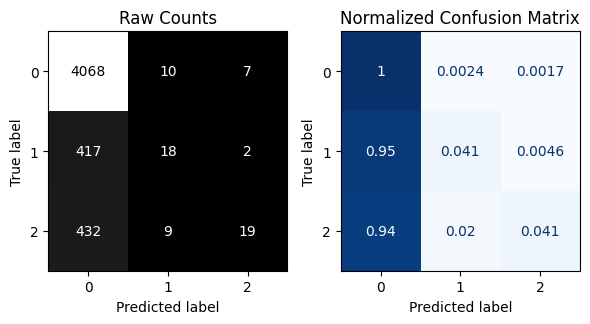


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1367
           1       0.25      0.03      0.05       150
           2       0.27      0.02      0.04       144

    accuracy                           0.82      1661
   macro avg       0.45      0.35      0.33      1661
weighted avg       0.73      0.82      0.75      1661



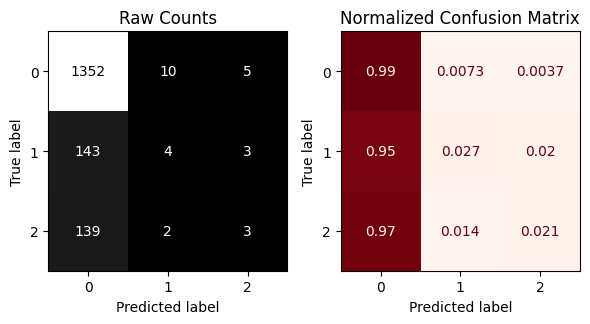

In [124]:
# Obtain evaluation metrics using custom function
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)


Model-With PCA

In [128]:
# Record the time it takes to make predictions with PCA data
%%time
preds_pca = knn_pca.predict(X_test_pca)



NameError: ignored

Compare the Models
n a markdown cell at the end of your notebook, answer the following questions:
Q1. How many features were used in the first model, and how many PCs were used in the PCA model?
Q2. Which model performed the best on the test set?
Q3. Which model was the fastest at making predictions?

In both models, there are three features for PCA.